In [17]:
from torchvision.transforms import RandomCrop, Compose, ToPILImage, Resize, ToTensor, Lambda
from diffusion_model.trainer import GaussianDiffusion, Trainer
from diffusion_model.unet import create_model
from dataset import NiftiImageGenerator, NiftiPairImageGenerator, NiftiImageGenerator2d, NiftiPairImageGenerator2d
import argparse
import torch

import os

In [18]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="1"

inputfolder = "/Users/pavel/Desktop/final_dataset/glioma tumor"
targetfolder = "/Users/pavel/Desktop/generative brains"
input_size = 128
num_channels = 64
num_res_blocks = 1
num_class_labels = 3
save_and_sample_every = 1000
with_condition = True
resume_weight = ''
train_lr = 1e-5
dimentions = 2
plot_on_save = True
timesteps = 250
batchsize = 10
epochs = 1000
depth_size = 128

In [21]:
if dimentions == 2:
    transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.unsqueeze(0)),
        Lambda(lambda t: t.transpose(2, 1)),
    ])
    
    input_transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.permute(2, 0, 1)),
        Lambda(lambda t: t.transpose(2, 1)),
    ])
    
    if with_condition:
        dataset = NiftiPairImageGenerator2d(
            inputfolder,
            targetfolder,
            input_size=input_size,
            transform=input_transform if with_condition else transform,
            target_transform=transform,
            full_channel_mask=True
        )
    else:
        dataset = NiftiImageGenerator2d(
            inputfolder,
            input_size=input_size,
            transform=transform
        )
elif dimentions == 3:
    # input tensor: (B, 1, H, W, D)  value range: [-1, 1]
    transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.unsqueeze(0)),
        Lambda(lambda t: t.transpose(3, 1)),
    ])
    
    input_transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.permute(3, 0, 1, 2)),
        Lambda(lambda t: t.transpose(3, 1)),
    ])
    
    if with_condition:
        dataset = NiftiPairImageGenerator(
            inputfolder,
            targetfolder,
            input_size=input_size,
            depth_size=depth_size,
            transform=input_transform if with_condition else transform,
            target_transform=transform,
            full_channel_mask=True
        )
    else:
        dataset = NiftiImageGenerator(
            inputfolder,
            input_size=input_size,
            depth_size=depth_size,
            transform=transform
        )

print(f"Dataset size: {len(dataset)}")

# print(len(dataset))

# in_channels = num_class_labels if with_condition else 1
# out_channels = 1


# model = create_model(input_size, num_channels, num_res_blocks, in_channels=in_channels, out_channels=out_channels, dims=dimentions)

# diffusion = GaussianDiffusion(
#     model,
#     image_size = input_size,
#     depth_size = depth_size if dimentions == 3 else None,
#     timesteps = timesteps,   # number of steps
#     loss_type = 'l1',    # L1 or L2
#     with_condition=with_condition,
#     channels=out_channels,
#     dims=dimentions
# )

# if len(resume_weight) > 0:
#     weight = torch.load(resume_weight, map_location='cuda')
#     diffusion.load_state_dict(weight['ema'])
#     print("Model Loaded!")

# trainer = Trainer(
#     diffusion,
#     dataset,
#     image_size = input_size,
#     depth_size = depth_size,
#     train_batch_size = batchsize,
#     train_lr = train_lr,
#     train_num_steps = epochs,         # total training steps
#     gradient_accumulate_every = 2,    # gradient accumulation steps
#     ema_decay = 0.995,                # exponential moving average decay
#     fp16 = False,#True,                       # turn on mixed precision training with apex
#     with_condition=with_condition,
#     save_and_sample_every = save_and_sample_every,
#     plot_on_save=plot_on_save
# )

# trainer.train()


Dataset size: 0


4
0: 0.7966392040252686
0: 0.8010973930358887
1: 0.8059185147285461
1: 0.793418824672699
2: 0.8051717281341553
2: 0.7919918298721313
3: 0.8060712814331055
3: 0.8000428676605225
4: 0.8070661425590515
4: 0.7936315536499023
5: 0.799423098564148
5: 0.7979838848114014
6: 0.7919504642486572
6: 0.8052367568016052
7: 0.79531329870224
7: 0.7983354330062866
8: 0.8044024705886841
8: 0.7896661758422852
9: 0.8003807663917542
9: 0.7946406006813049
10: 0.7933863401412964
10: 0.7899086475372314
11: 0.7822897434234619
11: 0.7886441946029663
12: 0.7938401103019714
12: 0.7976904511451721
13: 0.7999297380447388
13: 0.7882493138313293
14: 0.7901369333267212
14: 0.7918293476104736
15: 0.7877739667892456
15: 0.7890104055404663
16: 0.7856508493423462
16: 0.8010096549987793
17: 0.7890452742576599
17: 0.792594850063324
18: 0.794235110282898
18: 0.7844786643981934
19: 0.7929561138153076
19: 0.793197512626648
20: 0.7860426902770996
20: 0.7919538617134094
21: 0.7870759963989258
21: 0.7821118831634521
22: 0.7865618

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 52.87it/s]


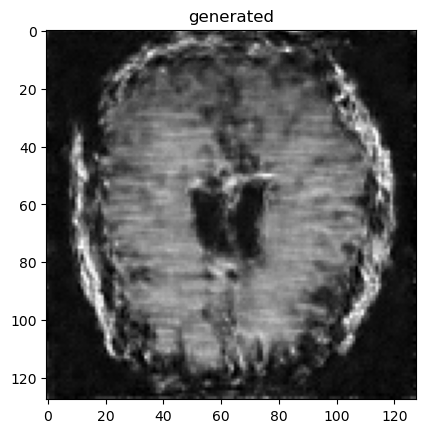

1001: 0.12213402986526489
1001: 0.1881037950515747
1002: 0.07451792061328888
1002: 0.1999358981847763
1003: 0.07112982124090195
1003: 0.07443702965974808
1004: 0.297929048538208
1004: 0.12481940537691116
1005: 0.1347898542881012
1005: 0.16196100413799286
1006: 0.0920335054397583
1006: 0.07395318150520325
1007: 0.25965097546577454
1007: 0.286828875541687
1008: 0.20164600014686584
1008: 0.06007542461156845
1009: 0.21328233182430267
1009: 0.2063841074705124
1010: 0.24377357959747314
1010: 0.10607901960611343
1011: 0.13387878239154816
1011: 0.18368445336818695
1012: 0.14094215631484985
1012: 0.11847379803657532
1013: 0.1255761981010437
1013: 0.08571212738752365
1014: 0.1281953603029251
1014: 0.09733261168003082
1015: 0.09358194470405579
1015: 0.07296915352344513
1016: 0.14585793018341064
1016: 0.13480184972286224
1017: 0.16260036826133728
1017: 0.1530318260192871
1018: 0.0920821875333786
1018: 0.07508720457553864
1019: 0.07432671636343002
1019: 0.09801926463842392
1020: 0.09119868278503418

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 55.06it/s]


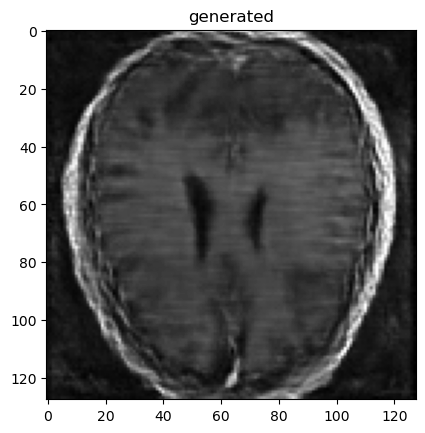

2001: 0.15001332759857178
2001: 0.2324567437171936
2002: 0.13325397670269012
2002: 0.08169925957918167
2003: 0.027268119156360626
2003: 0.2850532531738281
2004: 0.04972323775291443
2004: 0.16942428052425385
2005: 0.14490896463394165
2005: 0.16612085700035095
2006: 0.1053629070520401
2006: 0.1805223822593689
2007: 0.03683330491185188
2007: 0.10099499672651291
2008: 0.4556109607219696
2008: 0.031762126833200455
2009: 0.16582345962524414
2009: 0.1023017093539238
2010: 0.09904570877552032
2010: 0.06192705035209656
2011: 0.0754946619272232
2011: 0.14508017897605896
2012: 0.17609426379203796
2012: 0.06367972493171692
2013: 0.04728931188583374
2013: 0.3167991638183594
2014: 0.4744846820831299
2014: 0.1517980545759201
2015: 0.041460346430540085
2015: 0.06837677955627441
2016: 0.1095910519361496
2016: 0.17389324307441711
2017: 0.03307004272937775
2017: 0.1629137098789215
2018: 0.1612171232700348
2018: 0.19069868326187134
2019: 0.16516634821891785
2019: 0.02634928748011589
2020: 0.31749096512794

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 54.78it/s]


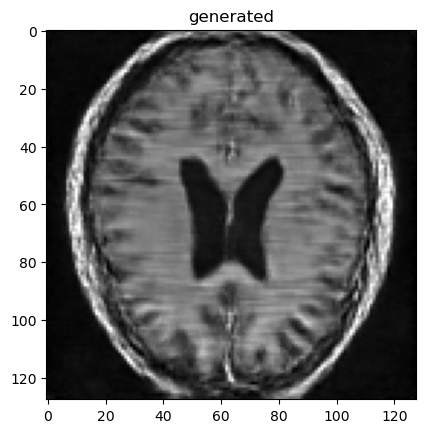

3001: 0.3717299699783325
3001: 0.19040560722351074
3002: 0.22310522198677063
3002: 0.04662088304758072
3003: 0.04764403775334358
3003: 0.02275478094816208
3004: 0.08715124428272247
3004: 0.13058604300022125
3005: 0.05367717891931534
3005: 0.021725598722696304
3006: 0.041384562849998474
3006: 0.291937917470932
3007: 0.046406399458646774
3007: 0.16468104720115662
3008: 0.16489946842193604
3008: 0.13147756457328796
3009: 0.09898162633180618
3009: 0.1143699437379837
3010: 0.2089356780052185
3010: 0.08584512770175934
3011: 0.23041173815727234
3011: 0.1101938784122467
3012: 0.06957098841667175
3012: 0.020559171214699745
3013: 0.10101155936717987
3013: 0.02175140380859375
3014: 0.024004869163036346
3014: 0.0665389746427536
3015: 0.055664803832769394
3015: 0.025650084018707275
3016: 0.17316961288452148
3016: 0.12680584192276
3017: 0.22678959369659424
3017: 0.06111183017492294
3018: 0.08929821848869324
3018: 0.07336843013763428
3019: 0.049165599048137665
3019: 0.09787559509277344
3020: 0.019670

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.09it/s]


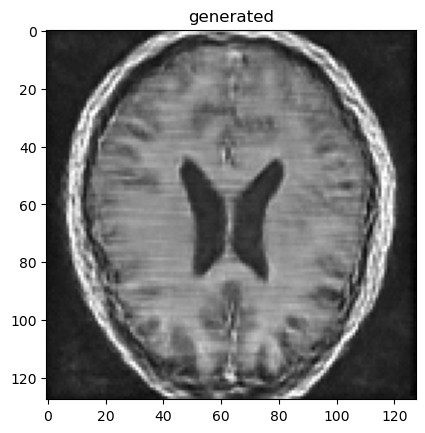

4001: 0.05912584811449051
4001: 0.02294895425438881
4002: 0.09914422035217285
4002: 0.10655969381332397
4003: 0.11585705727338791
4003: 0.09066534042358398
4004: 0.07960930466651917
4004: 0.089393749833107
4005: 0.08605979382991791
4005: 0.02896658144891262
4006: 0.1314316987991333
4006: 0.019001398235559464
4007: 0.04440600797533989
4007: 0.5053287744522095
4008: 0.14733505249023438
4008: 0.05589544400572777
4009: 0.090483158826828
4009: 0.018396154046058655
4010: 0.11407973617315292
4010: 0.026895496994256973
4011: 0.3965855538845062
4011: 0.06546416878700256
4012: 0.6796794533729553
4012: 0.021061928942799568
4013: 0.15585759282112122
4013: 0.057499632239341736
4014: 0.050910040736198425
4014: 0.03458130732178688
4015: 0.10062267631292343
4015: 0.07248607277870178
4016: 0.04358452558517456
4016: 0.1277470886707306
4017: 0.05550428107380867
4017: 0.4811820685863495
4018: 0.4180905520915985
4018: 0.05098440498113632
4019: 0.2718249559402466
4019: 0.03835473582148552
4020: 0.2254327535

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.91it/s]


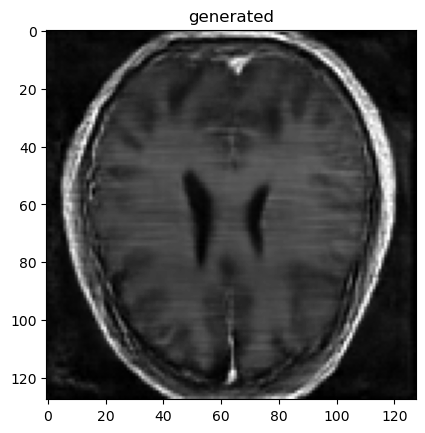

5001: 0.04079239070415497
5001: 0.052984435111284256
5002: 0.21010378003120422
5002: 0.03735199570655823
5003: 0.030923355370759964
5003: 0.025875110179185867
5004: 0.07947154343128204
5004: 0.25307369232177734
5005: 0.13747331500053406
5005: 0.04093034192919731
5006: 0.03897392749786377
5006: 0.06017761677503586
5007: 0.17325381934642792
5007: 0.05013683810830116
5008: 0.03318636119365692
5008: 0.1624571979045868
5009: 0.2968095541000366
5009: 0.10889200866222382
5010: 0.1292710304260254
5010: 0.11840153485536575
5011: 0.026125062257051468
5011: 0.04115276783704758
5012: 0.08829391002655029
5012: 0.17644602060317993
5013: 0.1738867163658142
5013: 0.17564435303211212
5014: 0.06265981495380402
5014: 0.08448082208633423
5015: 0.1339123398065567
5015: 0.1032303124666214
5016: 0.026685338467359543
5016: 0.05119021236896515
5017: 0.04517308995127678
5017: 0.040384918451309204
5018: 0.03781689703464508
5018: 0.13883107900619507
5019: 0.030112626031041145
5019: 0.06180616840720177
5020: 0.057

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.52it/s]


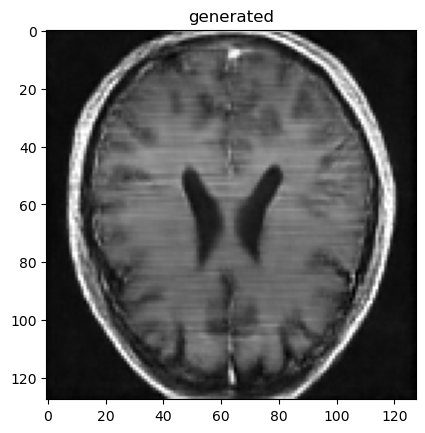

6001: 0.05145248398184776
6001: 0.10131367295980453
6002: 0.07347224652767181
6002: 0.03423142805695534
6003: 0.08815020322799683
6003: 0.07825219631195068
6004: 0.28619736433029175
6004: 0.04260611534118652
6005: 0.03527560830116272
6005: 0.035123713314533234
6006: 0.10256548225879669
6006: 0.04461759328842163
6007: 0.02254934422671795
6007: 0.04147115349769592
6008: 0.02702508307993412
6008: 0.2158663421869278
6009: 0.4594099521636963
6009: 0.09893535822629929
6010: 0.09285090863704681
6010: 0.04660680145025253
6011: 0.031951405107975006
6011: 0.019625646993517876
6012: 0.028908658772706985
6012: 0.0392160527408123
6013: 0.0393441766500473
6013: 0.0794740840792656
6014: 0.049090802669525146
6014: 0.019135799258947372
6015: 0.12483350187540054
6015: 0.025183312594890594
6016: 0.041889697313308716
6016: 0.08264099806547165
6017: 0.027123143896460533
6017: 0.05115562677383423
6018: 0.01847633719444275
6018: 0.034013018012046814
6019: 0.013548435643315315
6019: 0.037008024752140045
6020:

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 52.71it/s]


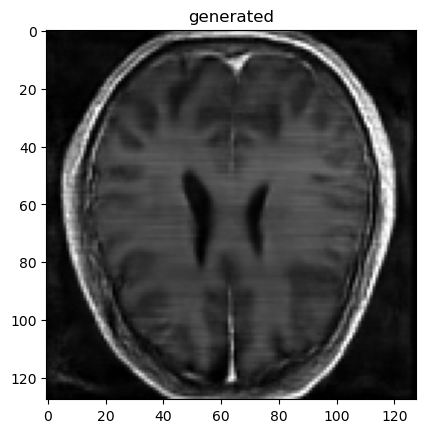

7001: 0.060935281217098236
7001: 0.04856949672102928
7002: 0.043798986822366714
7002: 0.02595597133040428
7003: 0.034189097583293915
7003: 0.06876032054424286
7004: 0.030704250559210777
7004: 0.09465503692626953
7005: 0.021144693717360497
7005: 0.08190591633319855
7006: 0.029191000387072563
7006: 0.07716645300388336
7007: 0.022528447210788727
7007: 0.050130438059568405
7008: 0.12630516290664673
7008: 0.03222821280360222
7009: 0.022190634161233902
7009: 0.08460931479930878
7010: 0.03587456792593002
7010: 0.083855539560318
7011: 0.047179557383060455
7011: 0.06716214120388031
7012: 0.12548129260540009
7012: 0.4490799307823181
7013: 0.056011706590652466
7013: 0.05106915533542633
7014: 0.09208613634109497
7014: 0.03527108579874039
7015: 0.034186623990535736
7015: 0.29281216859817505
7016: 0.02649421989917755
7016: 0.19925746321678162
7017: 0.024950049817562103
7017: 0.025936700403690338
7018: 0.04830528795719147
7018: 0.06315496563911438
7019: 0.034491799771785736
7019: 0.12803968787193298


sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.41it/s]


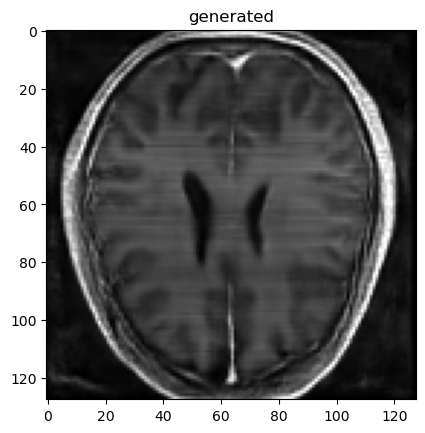

8001: 0.03394250571727753
8001: 0.06552325934171677
8002: 0.048517219722270966
8002: 0.028146028518676758
8003: 0.11254531145095825
8003: 0.020031968131661415
8004: 0.08131542801856995
8004: 0.027563046663999557
8005: 0.03526310995221138
8005: 0.05829758942127228
8006: 0.020612584426999092
8006: 0.04841220751404762
8007: 0.14857861399650574
8007: 0.03403224050998688
8008: 0.08205540478229523
8008: 0.02009444311261177
8009: 0.04072468727827072
8009: 0.3106619119644165
8010: 0.02224823087453842
8010: 0.08198846131563187
8011: 0.1860274374485016
8011: 0.08014001697301865
8012: 0.025900933891534805
8012: 0.06763242185115814
8013: 0.06715133041143417
8013: 0.08350721001625061
8014: 0.34191638231277466
8014: 0.05092613026499748
8015: 0.11818388104438782
8015: 0.15668237209320068
8016: 0.042542025446891785
8016: 0.08956760913133621
8017: 0.1733487844467163
8017: 0.15614831447601318
8018: 0.302979052066803
8018: 0.019465241581201553
8019: 0.019549941644072533
8019: 0.2269330620765686
8020: 0.0

In [ ]:
if dimentions == 2:
    transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.unsqueeze(0)),
        Lambda(lambda t: t.transpose(2, 1)),
    ])
    
    input_transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.permute(2, 0, 1)),
        Lambda(lambda t: t.transpose(2, 1)),
    ])
    
    if with_condition:
        dataset = NiftiPairImageGenerator2d(
            inputfolder,
            targetfolder,
            input_size=input_size,
            transform=input_transform if with_condition else transform,
            target_transform=transform,
            full_channel_mask=True
        )
    else:
        dataset = NiftiImageGenerator2d(
            inputfolder,
            input_size=input_size,
            transform=transform
        )
elif dimentions == 3:
    # input tensor: (B, 1, H, W, D)  value range: [-1, 1]
    transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.unsqueeze(0)),
        Lambda(lambda t: t.transpose(3, 1)),
    ])
    
    input_transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.permute(3, 0, 1, 2)),
        Lambda(lambda t: t.transpose(3, 1)),
    ])
    
    if with_condition:
        dataset = NiftiPairImageGenerator(
            inputfolder,
            targetfolder,
            input_size=input_size,
            depth_size=depth_size,
            transform=input_transform if with_condition else transform,
            target_transform=transform,
            full_channel_mask=True
        )
    else:
        dataset = NiftiImageGenerator(
            inputfolder,
            input_size=input_size,
            depth_size=depth_size,
            transform=transform
        )

print(len(dataset))

in_channels = num_class_labels if with_condition else 1
out_channels = 1


model = create_model(input_size, num_channels, num_res_blocks, in_channels=in_channels, out_channels=out_channels, dims=dimentions).cuda()

diffusion = GaussianDiffusion(
    model,
    image_size = input_size,
    depth_size = depth_size if dimentions == 3 else None,
    timesteps = timesteps,   # number of steps
    loss_type = 'l1',    # L1 or L2
    with_condition=with_condition,
    channels=out_channels,
    dims=dimentions
).cuda()

if len(resume_weight) > 0:
    weight = torch.load(resume_weight, map_location='cuda')
    diffusion.load_state_dict(weight['ema'])
    print("Model Loaded!")

trainer = Trainer(
    diffusion,
    dataset,
    image_size = input_size,
    depth_size = depth_size,
    train_batch_size = batchsize,
    train_lr = train_lr,
    train_num_steps = epochs,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    fp16 = False,#True,                       # turn on mixed precision training with apex
    with_condition=with_condition,
    save_and_sample_every = save_and_sample_every,
    plot_on_save=plot_on_save
)

trainer.train()


4
0: 0.7966392040252686
0: 0.8010973930358887
1: 0.8059185147285461
1: 0.793418824672699
2: 0.8051717281341553
2: 0.7919918298721313
3: 0.8060712814331055
3: 0.8000428676605225
4: 0.8070661425590515
4: 0.7936315536499023
5: 0.799423098564148
5: 0.7979838848114014
6: 0.7919504642486572
6: 0.8052367568016052
7: 0.79531329870224
7: 0.7983354330062866
8: 0.8044024705886841
8: 0.7896661758422852
9: 0.8003807663917542
9: 0.7946406006813049
10: 0.7933863401412964
10: 0.7899086475372314
11: 0.7822897434234619
11: 0.7886441946029663
12: 0.7938401103019714
12: 0.7976904511451721
13: 0.7999297380447388
13: 0.7882493138313293
14: 0.7901369333267212
14: 0.7918293476104736
15: 0.7877739667892456
15: 0.7890104055404663
16: 0.7856508493423462
16: 0.8010096549987793
17: 0.7890452742576599
17: 0.792594850063324
18: 0.794235110282898
18: 0.7844786643981934
19: 0.7929561138153076
19: 0.793197512626648
20: 0.7860426902770996
20: 0.7919538617134094
21: 0.7870759963989258
21: 0.7821118831634521
22: 0.7865618

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 52.87it/s]


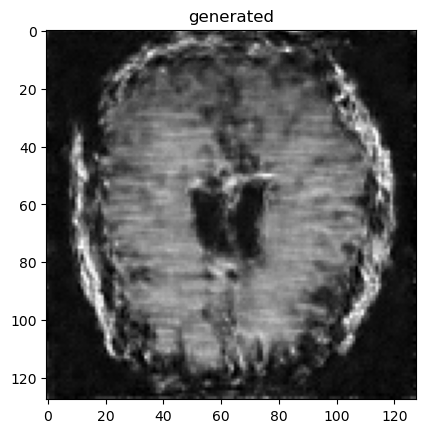

1001: 0.12213402986526489
1001: 0.1881037950515747
1002: 0.07451792061328888
1002: 0.1999358981847763
1003: 0.07112982124090195
1003: 0.07443702965974808
1004: 0.297929048538208
1004: 0.12481940537691116
1005: 0.1347898542881012
1005: 0.16196100413799286
1006: 0.0920335054397583
1006: 0.07395318150520325
1007: 0.25965097546577454
1007: 0.286828875541687
1008: 0.20164600014686584
1008: 0.06007542461156845
1009: 0.21328233182430267
1009: 0.2063841074705124
1010: 0.24377357959747314
1010: 0.10607901960611343
1011: 0.13387878239154816
1011: 0.18368445336818695
1012: 0.14094215631484985
1012: 0.11847379803657532
1013: 0.1255761981010437
1013: 0.08571212738752365
1014: 0.1281953603029251
1014: 0.09733261168003082
1015: 0.09358194470405579
1015: 0.07296915352344513
1016: 0.14585793018341064
1016: 0.13480184972286224
1017: 0.16260036826133728
1017: 0.1530318260192871
1018: 0.0920821875333786
1018: 0.07508720457553864
1019: 0.07432671636343002
1019: 0.09801926463842392
1020: 0.09119868278503418

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 55.06it/s]


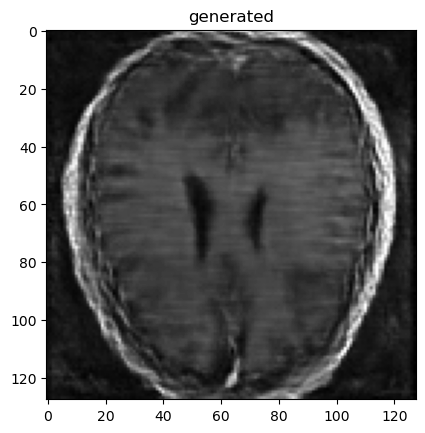

2001: 0.15001332759857178
2001: 0.2324567437171936
2002: 0.13325397670269012
2002: 0.08169925957918167
2003: 0.027268119156360626
2003: 0.2850532531738281
2004: 0.04972323775291443
2004: 0.16942428052425385
2005: 0.14490896463394165
2005: 0.16612085700035095
2006: 0.1053629070520401
2006: 0.1805223822593689
2007: 0.03683330491185188
2007: 0.10099499672651291
2008: 0.4556109607219696
2008: 0.031762126833200455
2009: 0.16582345962524414
2009: 0.1023017093539238
2010: 0.09904570877552032
2010: 0.06192705035209656
2011: 0.0754946619272232
2011: 0.14508017897605896
2012: 0.17609426379203796
2012: 0.06367972493171692
2013: 0.04728931188583374
2013: 0.3167991638183594
2014: 0.4744846820831299
2014: 0.1517980545759201
2015: 0.041460346430540085
2015: 0.06837677955627441
2016: 0.1095910519361496
2016: 0.17389324307441711
2017: 0.03307004272937775
2017: 0.1629137098789215
2018: 0.1612171232700348
2018: 0.19069868326187134
2019: 0.16516634821891785
2019: 0.02634928748011589
2020: 0.31749096512794

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 54.78it/s]


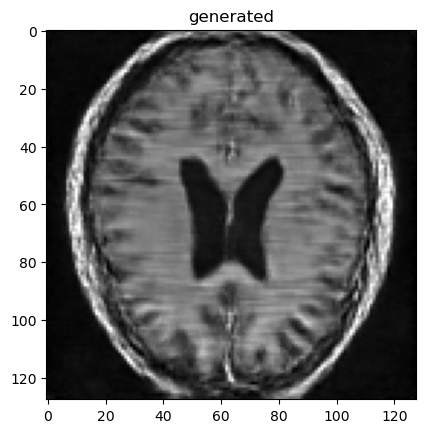

3001: 0.3717299699783325
3001: 0.19040560722351074
3002: 0.22310522198677063
3002: 0.04662088304758072
3003: 0.04764403775334358
3003: 0.02275478094816208
3004: 0.08715124428272247
3004: 0.13058604300022125
3005: 0.05367717891931534
3005: 0.021725598722696304
3006: 0.041384562849998474
3006: 0.291937917470932
3007: 0.046406399458646774
3007: 0.16468104720115662
3008: 0.16489946842193604
3008: 0.13147756457328796
3009: 0.09898162633180618
3009: 0.1143699437379837
3010: 0.2089356780052185
3010: 0.08584512770175934
3011: 0.23041173815727234
3011: 0.1101938784122467
3012: 0.06957098841667175
3012: 0.020559171214699745
3013: 0.10101155936717987
3013: 0.02175140380859375
3014: 0.024004869163036346
3014: 0.0665389746427536
3015: 0.055664803832769394
3015: 0.025650084018707275
3016: 0.17316961288452148
3016: 0.12680584192276
3017: 0.22678959369659424
3017: 0.06111183017492294
3018: 0.08929821848869324
3018: 0.07336843013763428
3019: 0.049165599048137665
3019: 0.09787559509277344
3020: 0.019670

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.09it/s]


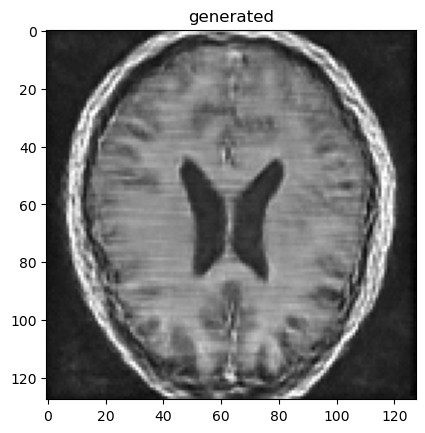

4001: 0.05912584811449051
4001: 0.02294895425438881
4002: 0.09914422035217285
4002: 0.10655969381332397
4003: 0.11585705727338791
4003: 0.09066534042358398
4004: 0.07960930466651917
4004: 0.089393749833107
4005: 0.08605979382991791
4005: 0.02896658144891262
4006: 0.1314316987991333
4006: 0.019001398235559464
4007: 0.04440600797533989
4007: 0.5053287744522095
4008: 0.14733505249023438
4008: 0.05589544400572777
4009: 0.090483158826828
4009: 0.018396154046058655
4010: 0.11407973617315292
4010: 0.026895496994256973
4011: 0.3965855538845062
4011: 0.06546416878700256
4012: 0.6796794533729553
4012: 0.021061928942799568
4013: 0.15585759282112122
4013: 0.057499632239341736
4014: 0.050910040736198425
4014: 0.03458130732178688
4015: 0.10062267631292343
4015: 0.07248607277870178
4016: 0.04358452558517456
4016: 0.1277470886707306
4017: 0.05550428107380867
4017: 0.4811820685863495
4018: 0.4180905520915985
4018: 0.05098440498113632
4019: 0.2718249559402466
4019: 0.03835473582148552
4020: 0.2254327535

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.91it/s]


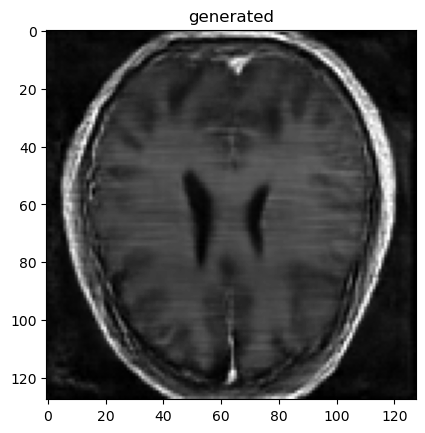

5001: 0.04079239070415497
5001: 0.052984435111284256
5002: 0.21010378003120422
5002: 0.03735199570655823
5003: 0.030923355370759964
5003: 0.025875110179185867
5004: 0.07947154343128204
5004: 0.25307369232177734
5005: 0.13747331500053406
5005: 0.04093034192919731
5006: 0.03897392749786377
5006: 0.06017761677503586
5007: 0.17325381934642792
5007: 0.05013683810830116
5008: 0.03318636119365692
5008: 0.1624571979045868
5009: 0.2968095541000366
5009: 0.10889200866222382
5010: 0.1292710304260254
5010: 0.11840153485536575
5011: 0.026125062257051468
5011: 0.04115276783704758
5012: 0.08829391002655029
5012: 0.17644602060317993
5013: 0.1738867163658142
5013: 0.17564435303211212
5014: 0.06265981495380402
5014: 0.08448082208633423
5015: 0.1339123398065567
5015: 0.1032303124666214
5016: 0.026685338467359543
5016: 0.05119021236896515
5017: 0.04517308995127678
5017: 0.040384918451309204
5018: 0.03781689703464508
5018: 0.13883107900619507
5019: 0.030112626031041145
5019: 0.06180616840720177
5020: 0.057

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.52it/s]


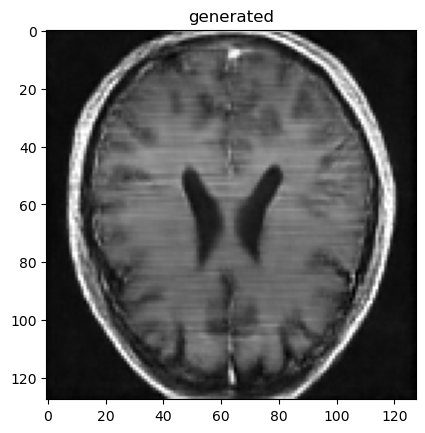

6001: 0.05145248398184776
6001: 0.10131367295980453
6002: 0.07347224652767181
6002: 0.03423142805695534
6003: 0.08815020322799683
6003: 0.07825219631195068
6004: 0.28619736433029175
6004: 0.04260611534118652
6005: 0.03527560830116272
6005: 0.035123713314533234
6006: 0.10256548225879669
6006: 0.04461759328842163
6007: 0.02254934422671795
6007: 0.04147115349769592
6008: 0.02702508307993412
6008: 0.2158663421869278
6009: 0.4594099521636963
6009: 0.09893535822629929
6010: 0.09285090863704681
6010: 0.04660680145025253
6011: 0.031951405107975006
6011: 0.019625646993517876
6012: 0.028908658772706985
6012: 0.0392160527408123
6013: 0.0393441766500473
6013: 0.0794740840792656
6014: 0.049090802669525146
6014: 0.019135799258947372
6015: 0.12483350187540054
6015: 0.025183312594890594
6016: 0.041889697313308716
6016: 0.08264099806547165
6017: 0.027123143896460533
6017: 0.05115562677383423
6018: 0.01847633719444275
6018: 0.034013018012046814
6019: 0.013548435643315315
6019: 0.037008024752140045
6020:

sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 52.71it/s]


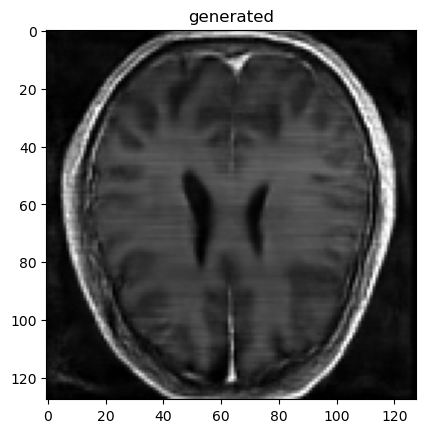

7001: 0.060935281217098236
7001: 0.04856949672102928
7002: 0.043798986822366714
7002: 0.02595597133040428
7003: 0.034189097583293915
7003: 0.06876032054424286
7004: 0.030704250559210777
7004: 0.09465503692626953
7005: 0.021144693717360497
7005: 0.08190591633319855
7006: 0.029191000387072563
7006: 0.07716645300388336
7007: 0.022528447210788727
7007: 0.050130438059568405
7008: 0.12630516290664673
7008: 0.03222821280360222
7009: 0.022190634161233902
7009: 0.08460931479930878
7010: 0.03587456792593002
7010: 0.083855539560318
7011: 0.047179557383060455
7011: 0.06716214120388031
7012: 0.12548129260540009
7012: 0.4490799307823181
7013: 0.056011706590652466
7013: 0.05106915533542633
7014: 0.09208613634109497
7014: 0.03527108579874039
7015: 0.034186623990535736
7015: 0.29281216859817505
7016: 0.02649421989917755
7016: 0.19925746321678162
7017: 0.024950049817562103
7017: 0.025936700403690338
7018: 0.04830528795719147
7018: 0.06315496563911438
7019: 0.034491799771785736
7019: 0.12803968787193298


sampling loop time step: 100%|██████████| 250/250 [00:04<00:00, 53.41it/s]


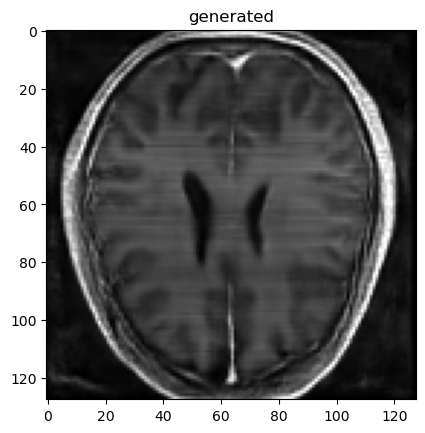

8001: 0.03394250571727753
8001: 0.06552325934171677
8002: 0.048517219722270966
8002: 0.028146028518676758
8003: 0.11254531145095825
8003: 0.020031968131661415
8004: 0.08131542801856995
8004: 0.027563046663999557
8005: 0.03526310995221138
8005: 0.05829758942127228
8006: 0.020612584426999092
8006: 0.04841220751404762
8007: 0.14857861399650574
8007: 0.03403224050998688
8008: 0.08205540478229523
8008: 0.02009444311261177
8009: 0.04072468727827072
8009: 0.3106619119644165
8010: 0.02224823087453842
8010: 0.08198846131563187
8011: 0.1860274374485016
8011: 0.08014001697301865
8012: 0.025900933891534805
8012: 0.06763242185115814
8013: 0.06715133041143417
8013: 0.08350721001625061
8014: 0.34191638231277466
8014: 0.05092613026499748
8015: 0.11818388104438782
8015: 0.15668237209320068
8016: 0.042542025446891785
8016: 0.08956760913133621
8017: 0.1733487844467163
8017: 0.15614831447601318
8018: 0.302979052066803
8018: 0.019465241581201553
8019: 0.019549941644072533
8019: 0.2269330620765686
8020: 0.0

In [ ]:
if dimentions == 2:
    transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.unsqueeze(0)),
        Lambda(lambda t: t.transpose(2, 1)),
    ])
    
    input_transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.permute(2, 0, 1)),
        Lambda(lambda t: t.transpose(2, 1)),
    ])
    
    if with_condition:
        dataset = NiftiPairImageGenerator2d(
            inputfolder,
            targetfolder,
            input_size=input_size,
            transform=input_transform if with_condition else transform,
            target_transform=transform,
            full_channel_mask=True
        )
    else:
        dataset = NiftiImageGenerator2d(
            inputfolder,
            input_size=input_size,
            transform=transform
        )
elif dimentions == 3:
    # input tensor: (B, 1, H, W, D)  value range: [-1, 1]
    transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.unsqueeze(0)),
        Lambda(lambda t: t.transpose(3, 1)),
    ])
    
    input_transform = Compose([
        Lambda(lambda t: torch.tensor(t).float()),
        Lambda(lambda t: (t * 2) - 1),
        Lambda(lambda t: t.permute(3, 0, 1, 2)),
        Lambda(lambda t: t.transpose(3, 1)),
    ])
    
    if with_condition:
        dataset = NiftiPairImageGenerator(
            inputfolder,
            targetfolder,
            input_size=input_size,
            depth_size=depth_size,
            transform=input_transform if with_condition else transform,
            target_transform=transform,
            full_channel_mask=True
        )
    else:
        dataset = NiftiImageGenerator(
            inputfolder,
            input_size=input_size,
            depth_size=depth_size,
            transform=transform
        )

print(len(dataset))

in_channels = num_class_labels if with_condition else 1
out_channels = 1


model = create_model(input_size, num_channels, num_res_blocks, in_channels=in_channels, out_channels=out_channels, dims=dimentions).cuda()

diffusion = GaussianDiffusion(
    model,
    image_size = input_size,
    depth_size = depth_size if dimentions == 3 else None,
    timesteps = timesteps,   # number of steps
    loss_type = 'l1',    # L1 or L2
    with_condition=with_condition,
    channels=out_channels,
    dims=dimentions
).cuda()

if len(resume_weight) > 0:
    weight = torch.load(resume_weight, map_location='cuda')
    diffusion.load_state_dict(weight['ema'])
    print("Model Loaded!")

trainer = Trainer(
    diffusion,
    dataset,
    image_size = input_size,
    depth_size = depth_size,
    train_batch_size = batchsize,
    train_lr = train_lr,
    train_num_steps = epochs,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    fp16 = False,#True,                       # turn on mixed precision training with apex
    with_condition=with_condition,
    save_and_sample_every = save_and_sample_every,
    plot_on_save=plot_on_save
)

trainer.train()


In [ ]:
cd ./scripts

In [ ]:
!./train.sh

In [1]:
total_memory = torch.cuda.get_device_properties(1).total_memory
print(f"Total memory: {total_memory / (1024 ** 2)} MiB")

# Получение текущего использования памяти в байтах
used_memory = torch.cuda.memory_allocated()
print(f"Used memory: {used_memory / (1024 ** 2)} MiB")

NameError: name 'torch' is not defined